In [1]:
import pandas as pd
# import glob
# from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
import tqdm as notebook_tqdm
import joblib
import shap
from tabulate import tabulate

# data science libraries
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

# imbalanced learning libraries
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE


# custom modules
from package import my_modules

/home/neha/miniconda3/envs/challenge/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
rng = np.random.RandomState(42)
nthread=4

In [3]:
# read the median datasets
X_train_cleaned_median, X_test_cleaned_median, X_holdout_cleaned_median,y_train, y_test, y_holdout = joblib.load("../out_files/cleaned_splits/split_data_cleaned_median.joblib")

In [4]:
# Define the scoring metric 
ftwo_score = make_scorer(fbeta_score, beta=2)

In [5]:
my_modules.get_df_head_tail_shape(X_train_cleaned_median)
X_train_median_fe1 = my_modules.feature_eng(X_train_cleaned_median)
X_test_median_fe1 = my_modules.feature_eng(X_test_cleaned_median)
X_holdout_median_fe1=my_modules.feature_eng(X_holdout_cleaned_median)


DataFrame Shape:
(2400, 43)

DataFrame Head:
+------------+------------+------------+----------------+------------+------------------+--------------------+-------------------+----------------+-------------+------------+----------------+-------------+--------------------+-----------+----------+----------------+------------+-----------+------------------+-------------------+-----------------+-----------+--------------+-------------+------------------+-----------------+-------------+---------------+-------------+------------------+------------------+--------------+------------+-----------+----------+------+--------+-------------------+-------------+-------------+-------------+-------------+
| median_ALP | median_ALT | median_AST | median_Albumin | median_BUN | median_Bilirubin | median_Cholesterol | median_Creatinine | median_DiasABP | median_FiO2 | median_GCS | median_Glucose | median_HCO3 |     median_HCT     | median_HR | median_K | median_Lactate | median_MAP | median_Mg | median_NID

In [6]:
my_modules.get_df_head_tail_shape(X_train_median_fe1)
my_modules.get_df_head_tail_shape(X_test_median_fe1)
my_modules.get_df_head_tail_shape(X_holdout_median_fe1)



DataFrame Shape:
(2400, 39)

DataFrame Head:
+------------+----------------+------------+------------------+--------------------+-------------------+----------------+-------------+------------+----------------+--------------------+-----------+----------+----------------+------------+-----------+-------------------+-----------+-------------+------------------+-----------------+-------------+---------------+-------------+------------------+------------------+--------------+------------+-----------+----------+------+--------+-------------------+-------------+-------------+-------------+-------------+-------------------+----------------------+
| median_ALP | median_Albumin | median_BUN | median_Bilirubin | median_Cholesterol | median_Creatinine | median_DiasABP | median_FiO2 | median_GCS | median_Glucose |     median_HCT     | median_HR | median_K | median_Lactate | median_MAP | median_Mg |   median_NIMAP    | median_Na | median_PaO2 | median_Platelets | median_RespRate | median_SaO2 | me

In [7]:
# save the split datasets for baseline model 
joblib.dump((X_train_median_fe1, X_test_median_fe1, X_holdout_median_fe1,y_train, y_test, y_holdout), "../out_files/cleaned_splits/split_data_cleaned_median_fe1.joblib")

['../out_files/cleaned_splits/split_data_cleaned_median_fe1.joblib']

Training logistic_regression model...


Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced',
                                    random_state=RandomState(MT19937) at 0x794567369B40,
                                    solver='liblinear'))])

Calculating PR AUC...
Model PR AUC: 0.45


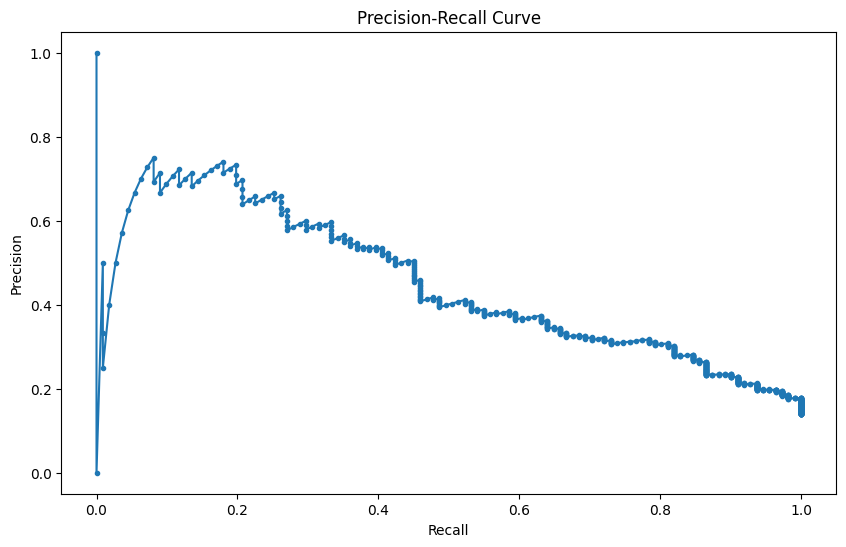

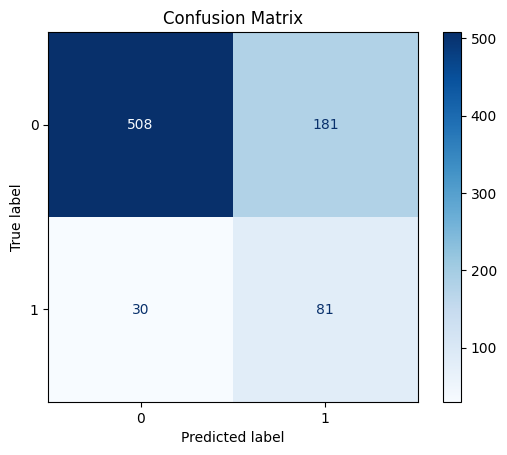

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       689
           1       0.31      0.73      0.43       111

    accuracy                           0.74       800
   macro avg       0.63      0.73      0.63       800
weighted avg       0.86      0.74      0.77       800



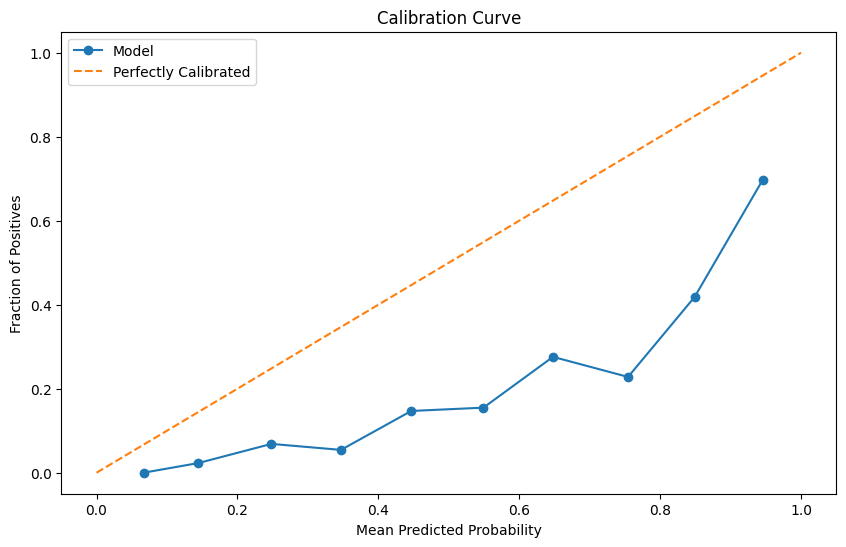

logistic_regression model does not have feature importances.
Training random_forest model...


Pipeline(steps=[('imputer', KNNImputer()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=RandomState(MT19937) at 0x794567369B40))])

Calculating PR AUC...
Model PR AUC: 0.42


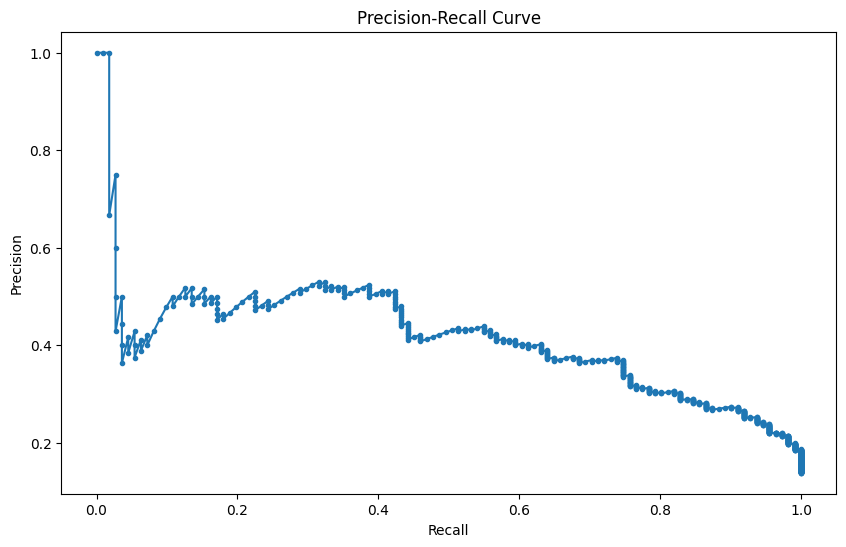

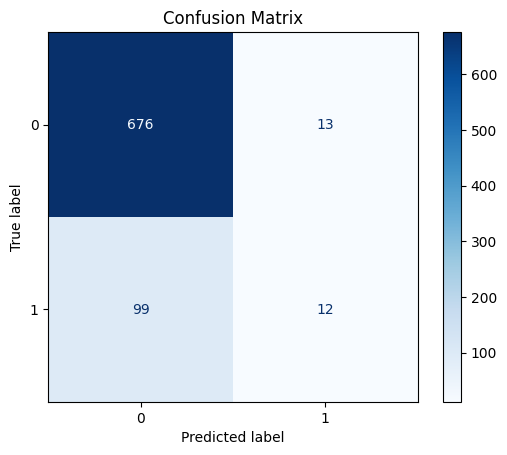

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       689
           1       0.48      0.11      0.18       111

    accuracy                           0.86       800
   macro avg       0.68      0.54      0.55       800
weighted avg       0.82      0.86      0.82       800



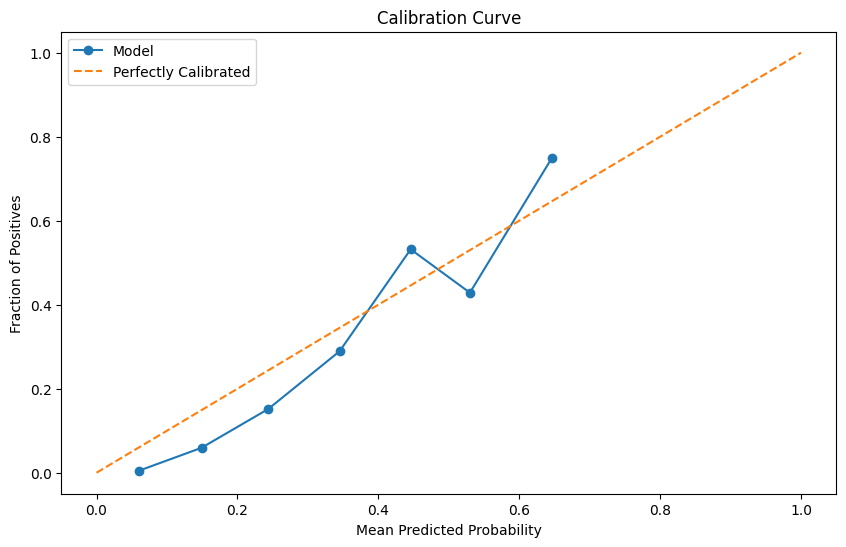

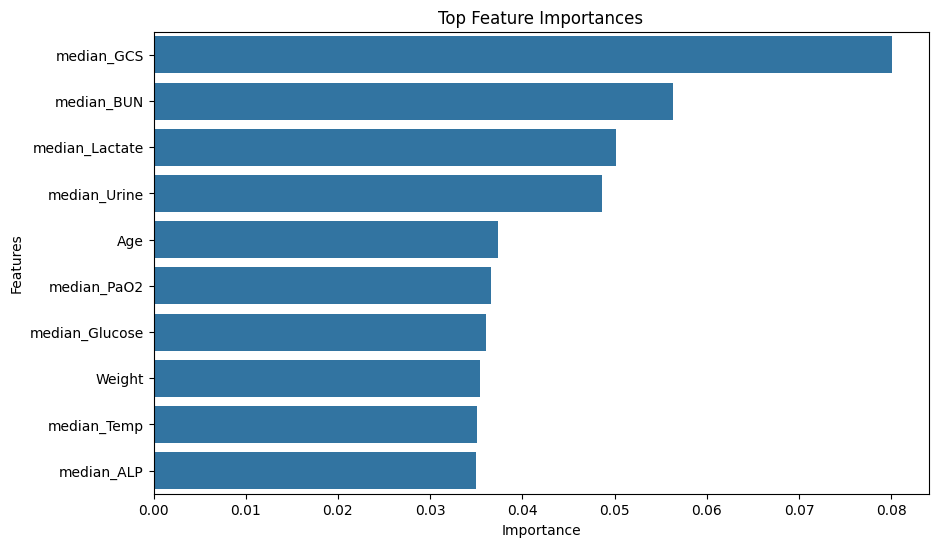

Training xgboost model...
Using class weights


Pipeline(steps=[('imputer', KNNImputer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='aucpr',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None, nthread=4, ...))])

Calculating PR AUC...
Model PR AUC: 0.42


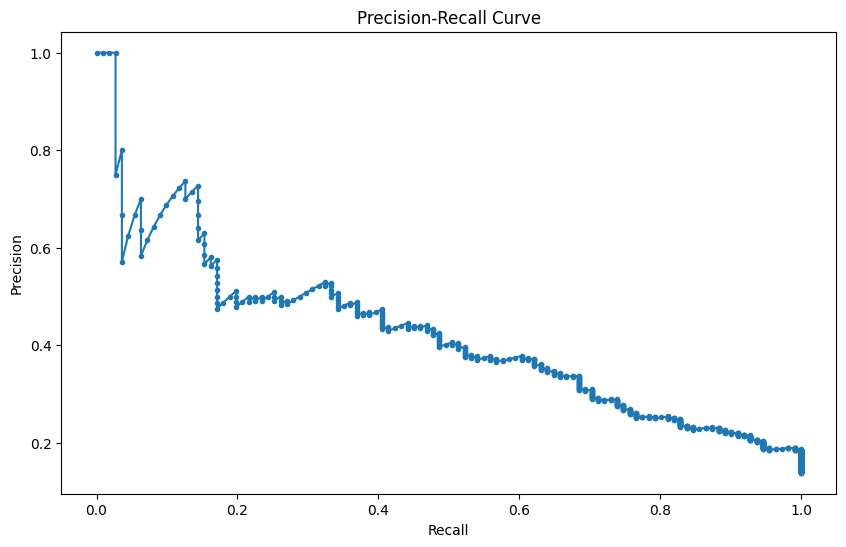

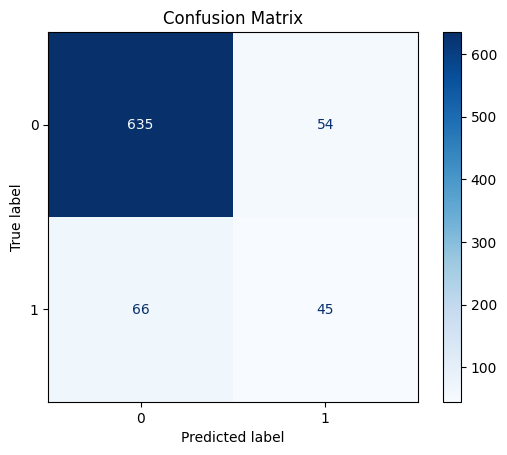

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       689
           1       0.45      0.41      0.43       111

    accuracy                           0.85       800
   macro avg       0.68      0.66      0.67       800
weighted avg       0.84      0.85      0.85       800



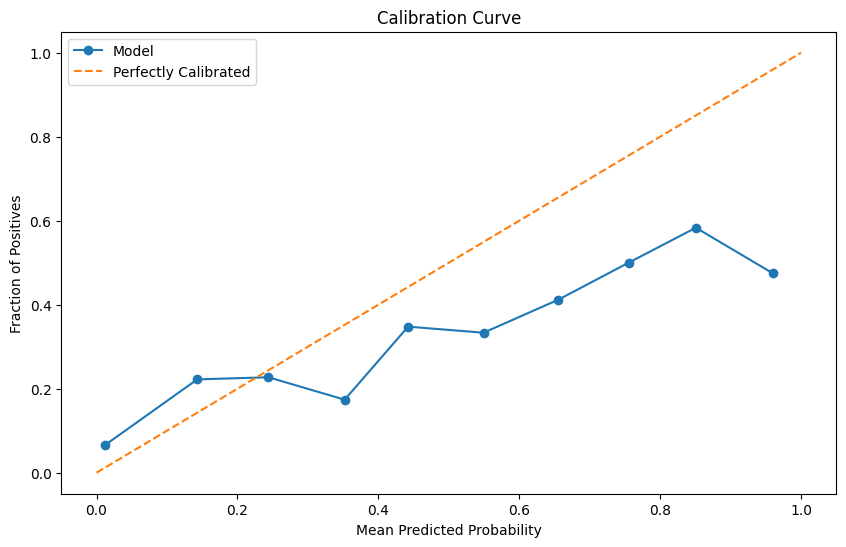

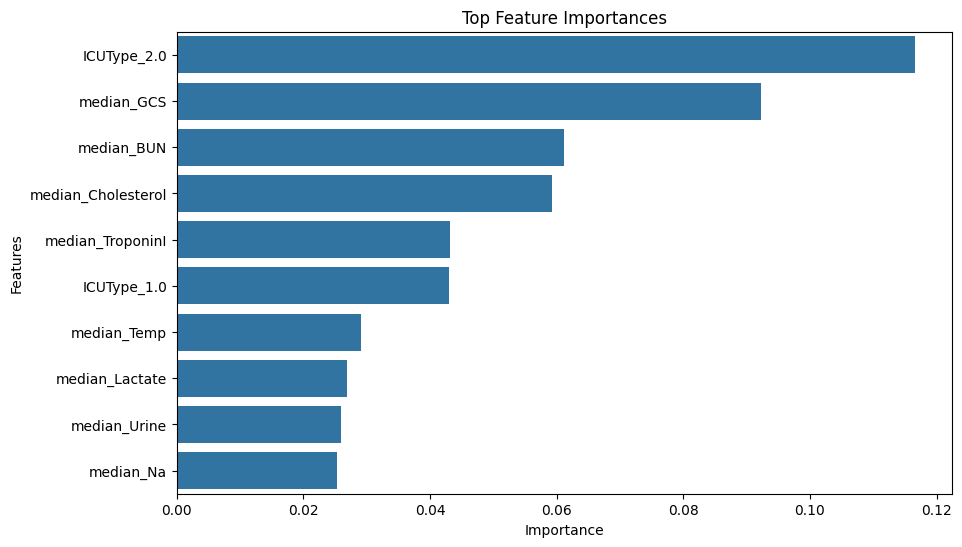

Training brf model...


Pipeline(steps=[('imputer', KNNImputer()),
                ('classifier',
                 BalancedRandomForestClassifier(max_depth=10,
                                                random_state=RandomState(MT19937) at 0x794567369B40,
                                                replacement=False,
                                                sampling_strategy='auto'))])

Calculating PR AUC...
Model PR AUC: 0.44


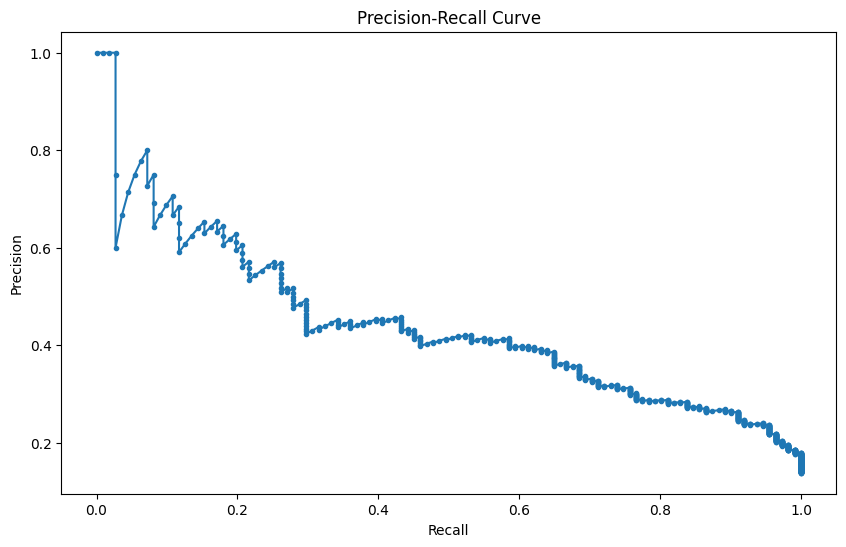

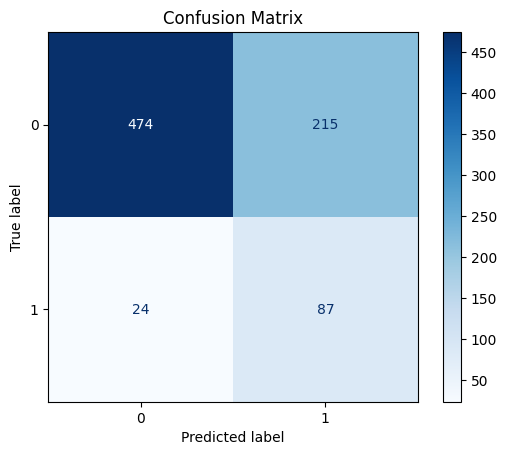

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80       689
           1       0.29      0.78      0.42       111

    accuracy                           0.70       800
   macro avg       0.62      0.74      0.61       800
weighted avg       0.86      0.70      0.75       800



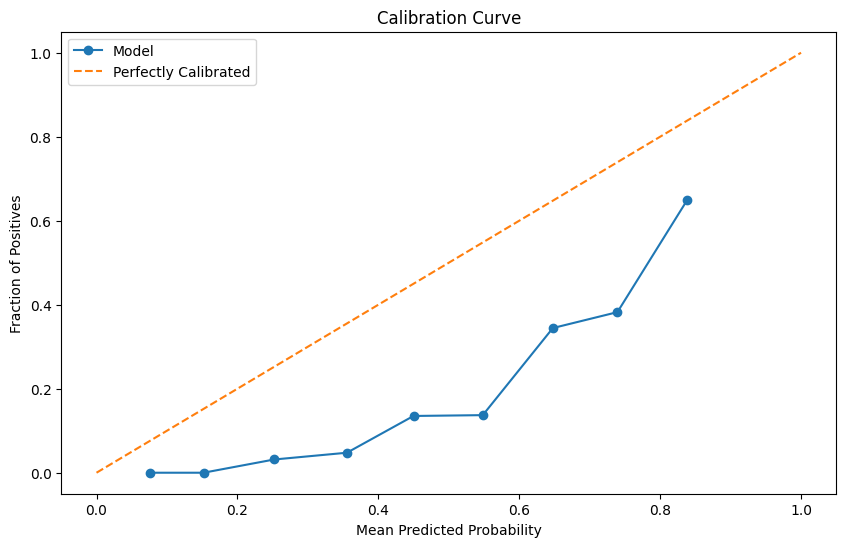

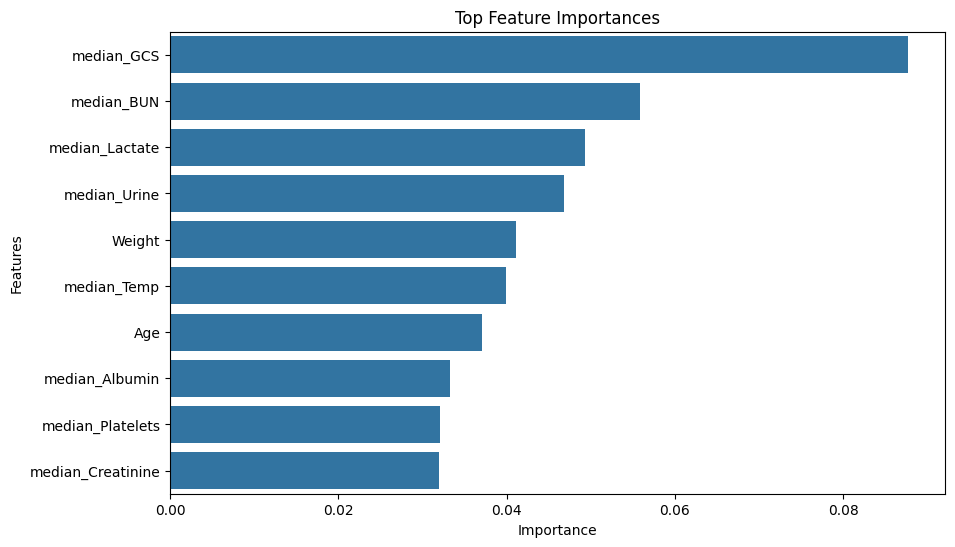

In [8]:
# run & evaluate logistic regression, random forest models

# Compute the positive class weight and sample weights for xgboost (imbalanced dataset)
pos_class_weight = (len(y_train) - np.sum(y_train)) / np.sum(y_train)

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train 
)

model_factory = {
    'logistic_regression': Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler()),
        # ('oversample', SMOTE(random_state=rng)), # from imblearn.pipeline import Pipeline if using SMOTE. Here it didn't improve the model, so skipping
        ('classifier', LogisticRegression(solver='liblinear', random_state=rng, class_weight='balanced'))
    ]),
    'random_forest': Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        # ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_estimators=100,random_state=rng, class_weight='balanced', max_depth=10)) 
    ]),
    'xgboost': Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        # ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state=rng, objective="binary:logistic",nthread=nthread, n_estimators=100, scale_pos_weight=pos_class_weight, max_depth = 10,eval_metric='aucpr' ))
    ]),
    'brf': Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        # ('scaler', StandardScaler()),
        ('classifier', BalancedRandomForestClassifier(n_estimators=100,random_state=rng, max_depth=10,sampling_strategy='auto', replacement=False)) 
    ])
}


for model_name, model in model_factory.items():
    print(f"Training {model_name} model...")
    if model_name == 'xgboost':
        print(f"Using class weights")
        model.fit(X_train_median_fe1, y_train,classifier__sample_weight=sample_weights)
    else:
        model.fit(X_train_median_fe1, y_train)
    my_modules.evaluate_model(model, X_test_median_fe1, y_test)
    # plot feature importances
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        feature_importances = my_modules.get_feature_importances(model.named_steps['classifier'], X_train_median_fe1, y_train)
        n_features_to_plot = min(10, len(feature_importances))
        my_modules.plot_feature_importances(feature_importances, n=n_features_to_plot)
    else:
        print(f"{model_name} model does not have feature importances.")   
        

- Logistic regression and balanced Random forest classifier are the ones that should be shortlisted for parameter tuning


Training logistic_regression with GridSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x794567369B40, shuffle=True),
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=RandomState(MT19937) at 0x794567369B40,
                                                           solver='liblinear'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=1)

Best parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best cross-validation F2 score for Logistic Regression:0.5598014338895221

Evaluating best Logistic Regression model from GridSearchCV:
Calculating PR AUC...
Model PR AUC: 0.45


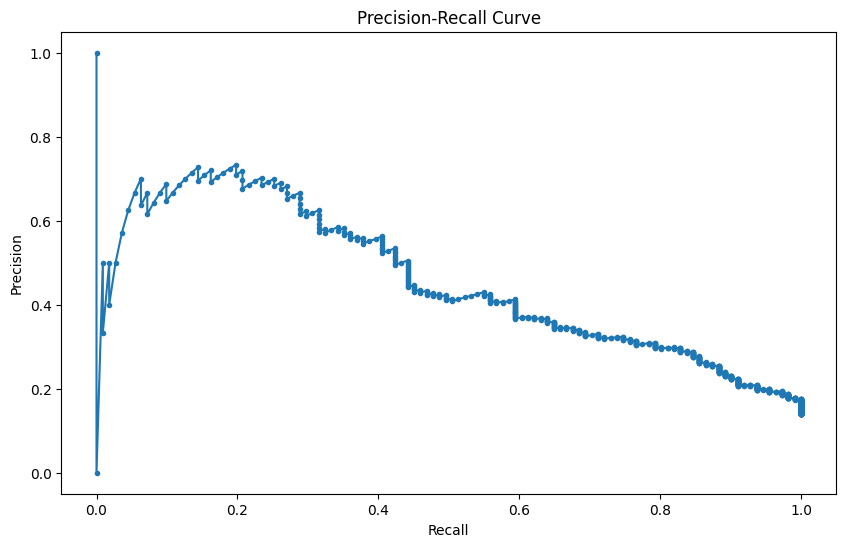

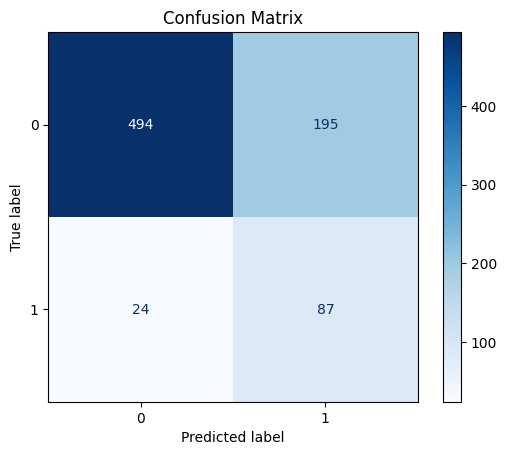

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       689
           1       0.31      0.78      0.44       111

    accuracy                           0.73       800
   macro avg       0.63      0.75      0.63       800
weighted avg       0.86      0.73      0.77       800



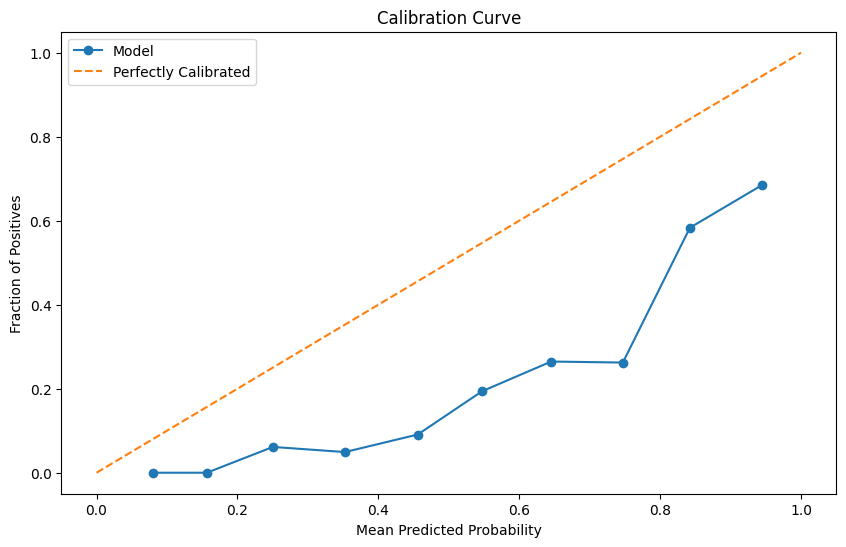

In [9]:
# Logistic regression parameter tuning 

logreg_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear',random_state=rng, class_weight='balanced'))
])

param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100], # regularization strengh - smaller value = stronger regularization
    'classifier__penalty': ['l1', 'l2']
}

# since this is in imbalanced dataset, setup StratifiedKFold for cross-validation 
cv_strategy = StratifiedKFold(n_splits=5, random_state=rng, shuffle=True)

grid_search_logreg = GridSearchCV(logreg_pipe, param_grid_logreg, cv=cv_strategy, scoring=ftwo_score, verbose=1)
print("Training logistic_regression with GridSearchCV...")
grid_search_logreg.fit(X_train_median_fe1, y_train)

print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best cross-validation F2 score for Logistic Regression:{grid_search_logreg.best_score_}")

# Evaluate the best model found by GridSearchCV
best_logreg_model = grid_search_logreg.best_estimator_
print("\nEvaluating best Logistic Regression model from GridSearchCV:")
my_modules.evaluate_model(best_logreg_model, X_test_median_fe1, y_test)

Training BalancedRandomForestClassifier with GridSearchCV...
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50, classifier__replacement=False, classifier__sampling_strategy=auto; total time=   1.3s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50, classifier__replacement=False, classifier__sampling_strategy=auto; total time=   1.3s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50, classifier__replacement=False, classifier__sampling_strategy=auto; total time=   1.4s
[CV] END classifier__criterion=gini, classifie

GridSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x794567369B40, shuffle=True),
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('classifier',
                                        BalancedRandomForestClassifier(random_state=RandomState(MT19937) at 0x794567369B40))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200],
                         'classifier__replacement': [False, True],
                         'classifier__sampling_strategy': ['auto', 'majority']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=2)

Best parameters for BalancedRandomForestClassifier:{'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100, 'classifier__replacement': False, 'classifier__sampling_strategy': 'auto'}
Best cross-validation fbeta_score score for BalancedRandomForestClassifier: 0.5993

Evaluating best BalancedRandomForestClassifier model from GridSearchCV on the test set:
Calculating PR AUC...
Model PR AUC: 0.43


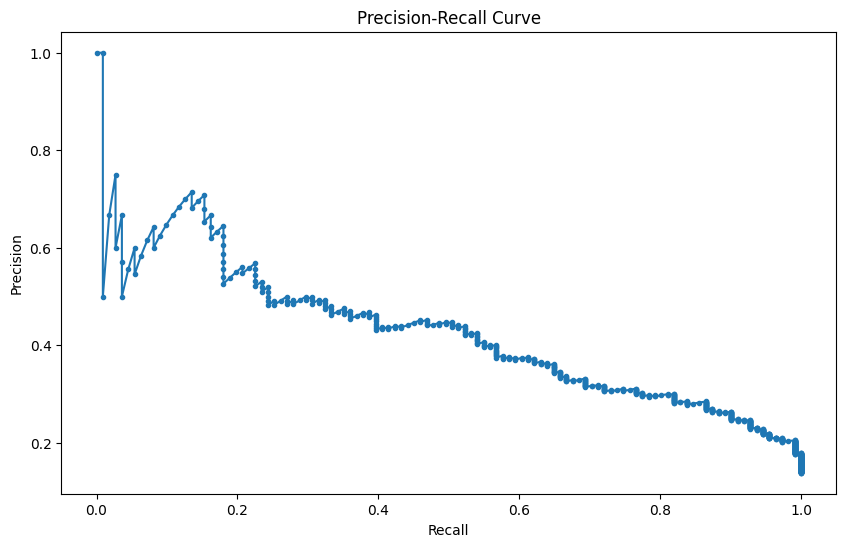

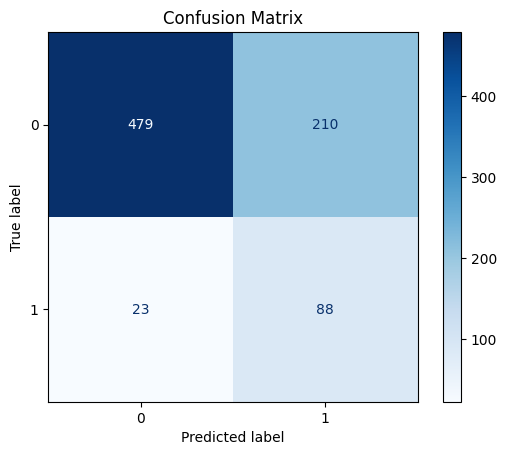

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80       689
           1       0.30      0.79      0.43       111

    accuracy                           0.71       800
   macro avg       0.62      0.74      0.62       800
weighted avg       0.86      0.71      0.75       800



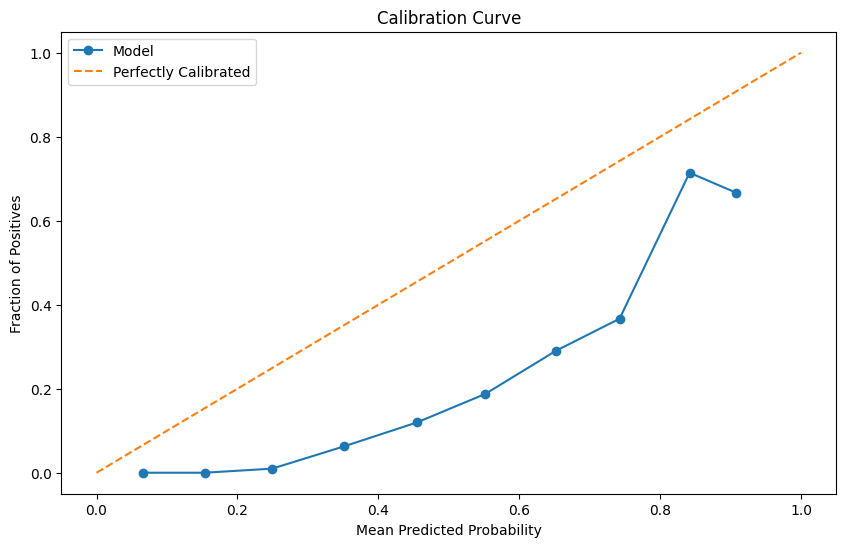

In [10]:
# Balanced random forest classifier parameter tuning
brf_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)), # If needed
    # ('scaler', StandardScaler()), # If needed
    ('classifier', BalancedRandomForestClassifier(random_state=rng))
])

param_grid_brf = {
    'classifier__n_estimators': [50,100, 200],  # 300
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5,10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'], # , 0.5
    'classifier__sampling_strategy': ['auto', 'majority'],
    'classifier__replacement': [False, True], # optional
    'classifier__criterion': ['gini', 'entropy'] # Can add if desired
}

# since this is in imbalanced dataset, setup StratifiedKFold for cross-validation 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=rng) # 5 will be compute intensive

grid_search_brf = GridSearchCV(
    estimator=brf_pipe,
    param_grid=param_grid_brf,
    cv=cv_strategy,
    scoring=ftwo_score, 
    verbose=2, 
    n_jobs=-1  #  for RF, gridsearchcv can be compute intensive so am opting for all available cores
)

print("Training BalancedRandomForestClassifier with GridSearchCV...")
grid_search_brf.fit(X_train_median_fe1, y_train)
# Best parameters and score
print(f"Best parameters for BalancedRandomForestClassifier:{grid_search_brf.best_params_}")
print(f"Best cross-validation {ftwo_score._score_func.__name__} score for BalancedRandomForestClassifier: {grid_search_brf.best_score_:.4f}")

# Evaluate the best model found by GridSearchCV on test set
best_brf_model = grid_search_brf.best_estimator_
print("\nEvaluating best BalancedRandomForestClassifier model from GridSearchCV on the test set:")
my_modules.evaluate_model(best_brf_model, X_test_median_fe1, y_test)

It was surprising to see XgBoost not do well. Confirming whether it was not an issue with my parameters

Training XgBoostClassifier with GridSearchCV...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END classifier__gamma=0.1, classifier__max_delta_step=1, classifier__max_depth=10, classifier__n_estimators=100; total time=   1.7s
[CV] END classifier__gamma=0.1, classifier__max_delta_step=1, classifier__max_depth=10, classifier__n_estimators=100; total time=   1.9s
[CV] END classifier__gamma=0.1, classifier__max_delta_step=1, classifier__max_depth=10, classifier__n_estimators=100; total time=   1.9s
[CV] END classifier__gamma=0.1, classifier__max_delta_step=1, classifier__max_depth=10, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__gamma=0.1, classifier__max_delta_step=1, classifier__max_depth=10, classifier__n_estimators=100; total time=   1.9s
[CV] END classifier__gamma=0.1, classifier__max_delta_step=1, classifier__max_depth=10, classifier__n_estimators=200; total time=   2.0s
[CV] END classifier__gamma=0.1, classifier__max_delta_step=1, classi

GridSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x794567369B40, shuffle=True),
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categor...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__gamma': [0.1, 0.2],
                         'classifier__max_delta_step': [1, 5, 10],
                         'classifier__max_depth': [10, 20, 30],
                         'classifier__n_estimators': [100, 200, 500]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=2)

Best parameters for XgBoostClassifier:{'classifier__gamma': 0.1, 'classifier__max_delta_step': 1, 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best cross-validation fbeta_score score for XgBoostClassifier: 0.4177

Evaluating best XgBoostClassifier model from GridSearchCV on the test set:
Calculating PR AUC...
Model PR AUC: 0.41


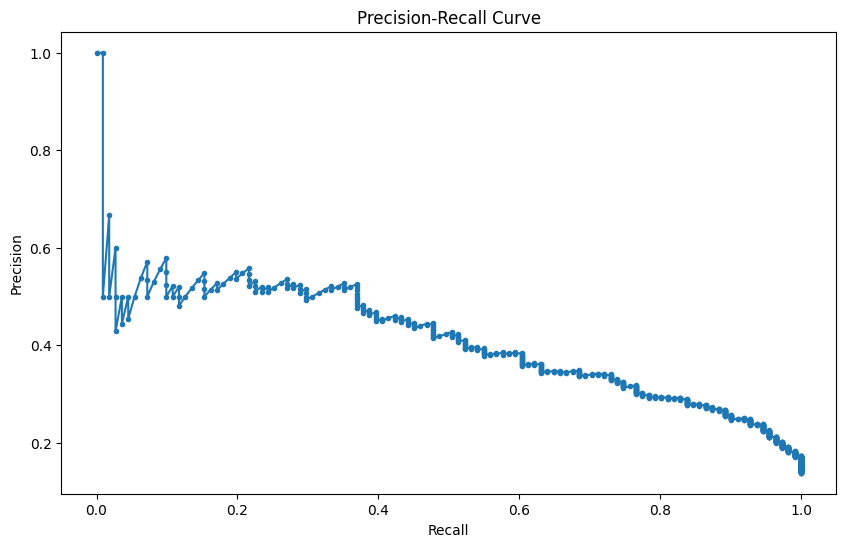

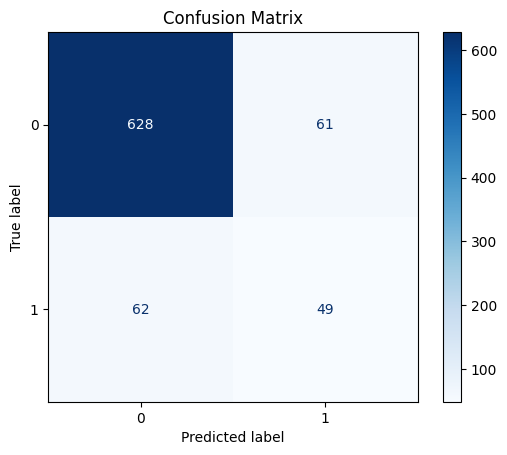

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       689
           1       0.45      0.44      0.44       111

    accuracy                           0.85       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.85      0.85      0.85       800



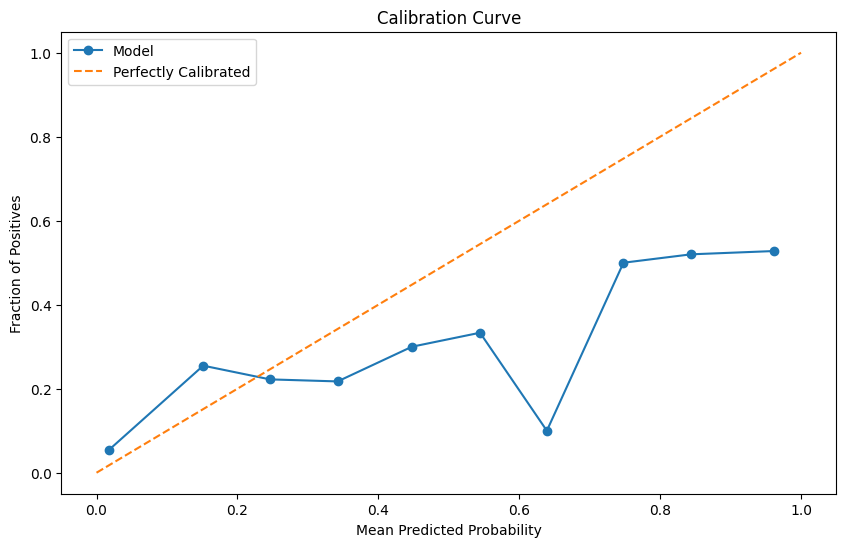

In [11]:
# Xgboost parameter tuning
pos_class_weight = (len(y_train) - np.sum(y_train)) / np.sum(y_train)

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train 
)

xgboost = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('classifier', XGBClassifier(random_state=rng, objective="binary:logistic",scale_pos_weight=pos_class_weight)) # eval_metric='aucpr' # nthread=nthread,

])

param_grid_brf = {
    'classifier__n_estimators': [100, 200, 500],  # 300
    'classifier__max_depth': [10, 20, 30],
    'classifier__gamma': [0.1,0.2],
    'classifier__max_delta_step': [1,5,10]
}

# since this is in imbalanced dataset, setup StratifiedKFold for cross-validation 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=rng) # 5 will be compute intensive

grid_search_xg = GridSearchCV(
    estimator=xgboost,
    param_grid=param_grid_brf,
    cv=cv_strategy,
    scoring=ftwo_score, 
    verbose=2, 
    n_jobs=-1  #  for RF, gridsearchcv can be compute intensive so am opting for all available cores
)

print("Training XgBoostClassifier with GridSearchCV...")
grid_search_xg.fit(X_train_median_fe1, y_train, classifier__sample_weight=sample_weights)
# Best parameters and score
print(f"Best parameters for XgBoostClassifier:{grid_search_xg.best_params_}")
print(f"Best cross-validation {ftwo_score._score_func.__name__} score for XgBoostClassifier: {grid_search_xg.best_score_:.4f}")

# Evaluate the best model found by GridSearchCV on test set
best_xgb_model = grid_search_xg.best_estimator_
print("\nEvaluating best XgBoostClassifier model from GridSearchCV on the test set:")
my_modules.evaluate_model(best_xgb_model, X_test_median_fe1, y_test)

# Holdout set

Testing performance of optimized logistic regression model with holdout test that the model was entirely blind to
Calculating PR AUC...
Model PR AUC: 0.49


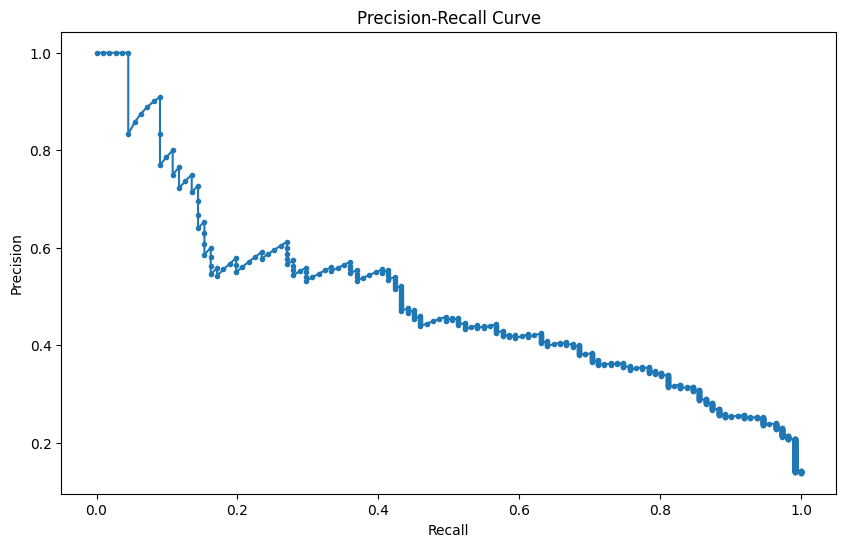

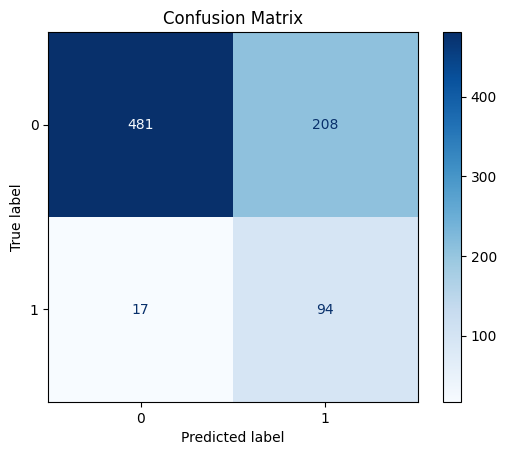

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       689
           1       0.31      0.85      0.46       111

    accuracy                           0.72       800
   macro avg       0.64      0.77      0.63       800
weighted avg       0.88      0.72      0.76       800



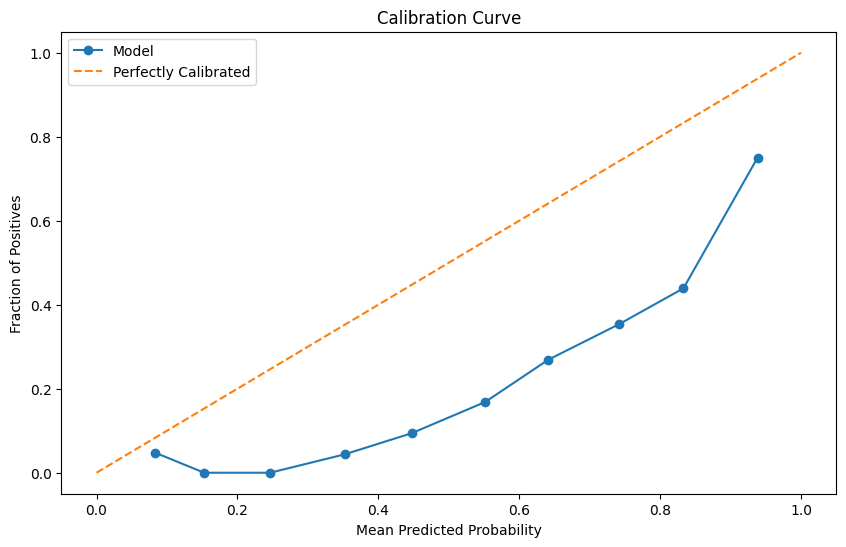

In [12]:
# The simpler logreg model is neck-to-neck with the complex RF. how do these now stack up with the holdout set?

# log reg best model with holdout
print(f"Testing performance of optimized logistic regression model with holdout test that the model was entirely blind to")
my_modules.evaluate_model(best_logreg_model, X_holdout_median_fe1, y_holdout)

Testing performance of optimized Random forest model with holdout test that the model was entirely blind to
Calculating PR AUC...
Model PR AUC: 0.55


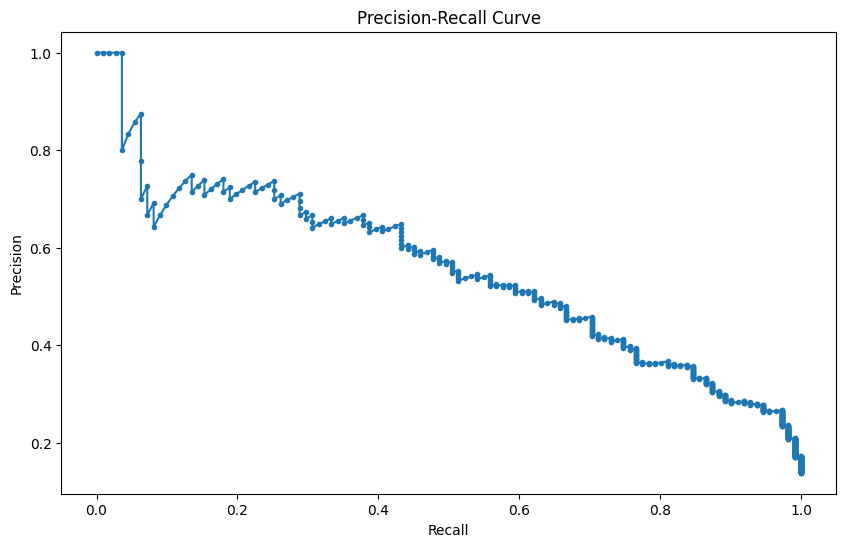

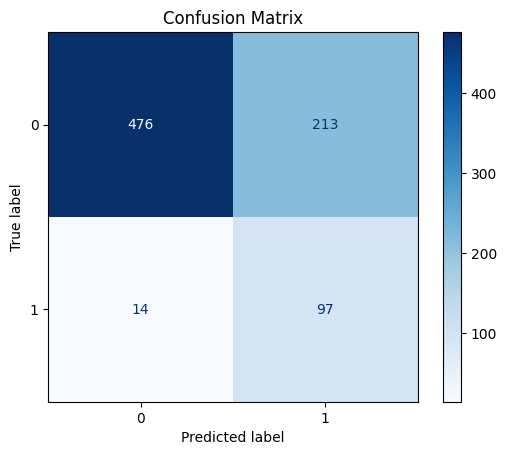

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       689
           1       0.31      0.87      0.46       111

    accuracy                           0.72       800
   macro avg       0.64      0.78      0.63       800
weighted avg       0.88      0.72      0.76       800



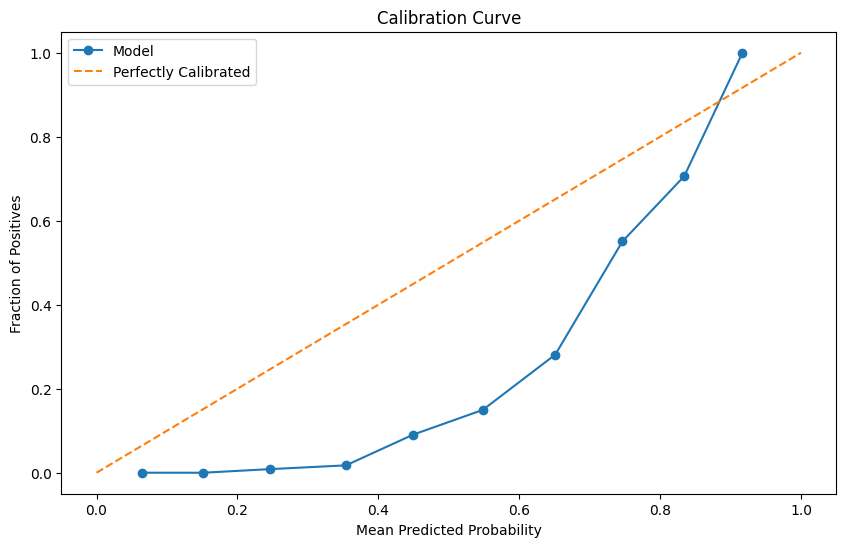

In [13]:
# rf best model with holdout
print(f"Testing performance of optimized Random forest model with holdout test that the model was entirely blind to")
my_modules.evaluate_model(best_brf_model, X_holdout_median_fe1, y_holdout)

In [14]:
# write the best models for EAI in 06-EAI
logreg_model_file = "../out_files/saved_models/best_logreg_model.joblib"
my_modules.save_model(best_logreg_model,logreg_model_file)
rf_model_file = "../out_files/saved_models/best_brf_model.joblib"
my_modules.save_model(best_brf_model, rf_model_file)


Model saved to ../out_files/saved_models/best_logreg_model.joblib
Model saved to ../out_files/saved_models/best_brf_model.joblib


# Explainable AI

Get Shapley values for the models

In [15]:
# # Read saved models & datasets

# best_logreg_model = joblib.load("../out_files/saved_models/best_logreg_model.joblib")
# best_brf_model = joblib.load("../out_files/saved_models/best_brf_model.joblib")

# X_train_median_fe1, X_test_median_fe1, X_holdout_median_fe1,y_train, y_test, y_holdout = joblib.load("../out_files/cleaned_splits/split_data_cleaned_median_fe1.joblib")

- Prep data for `shap`

In [16]:
# Best parameters for BalancedRandomForestClassifier:{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'classifier__replacement': True, 'classifier__sampling_strategy': 'auto'}

# Balanced random forest classifier parameter tuning
brf_best_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)), # If needed
    ('classifier', BalancedRandomForestClassifier(random_state=rng, criterion='gini',max_depth=None,n_estimators=100, max_features='sqrt',min_samples_leaf=2,min_samples_split=2,replacement=True, sampling_strategy='auto'))
])

brf_best_pipe.fit(X_train_median_fe1,y_train)

Pipeline(steps=[('imputer', KNNImputer()),
                ('classifier',
                 BalancedRandomForestClassifier(min_samples_leaf=2,
                                                random_state=RandomState(MT19937) at 0x794567369B40,
                                                sampling_strategy='auto'))])

In [17]:
# Best parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
logreg_best_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear',random_state=rng, class_weight='balanced', C=0.01, penalty='l2'))
])

logreg_best_pipe.fit(X_train_median_fe1,y_train)



Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    random_state=RandomState(MT19937) at 0x794567369B40,
                                    solver='liblinear'))])

In [18]:
# Best parameters for XgBoostClassifier:{'classifier__gamma': 0.2, 'classifier__max_delta_step': 5, 'classifier__max_depth': 20, 'classifier__n_estimators': 100}
# Xgboost parameter tuning
pos_class_weight = (len(y_train) - np.sum(y_train)) / np.sum(y_train)

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train 
)

xgboost_best_pipe = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('classifier', XGBClassifier(random_state=rng, objective="binary:logistic",gamma=0.2, max_delta_step=5,max_depth=20, n_estimators=100,scale_pos_weight=pos_class_weight)) # eval_metric='aucpr' # nthread=nthread,

])
xgboost_best_pipe.fit(X_train_median_fe1,y_train)

Pipeline(steps=[('imputer', KNNImputer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=5,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

PermutationExplainer explainer: 801it [1:59:59,  9.00s/it]                           


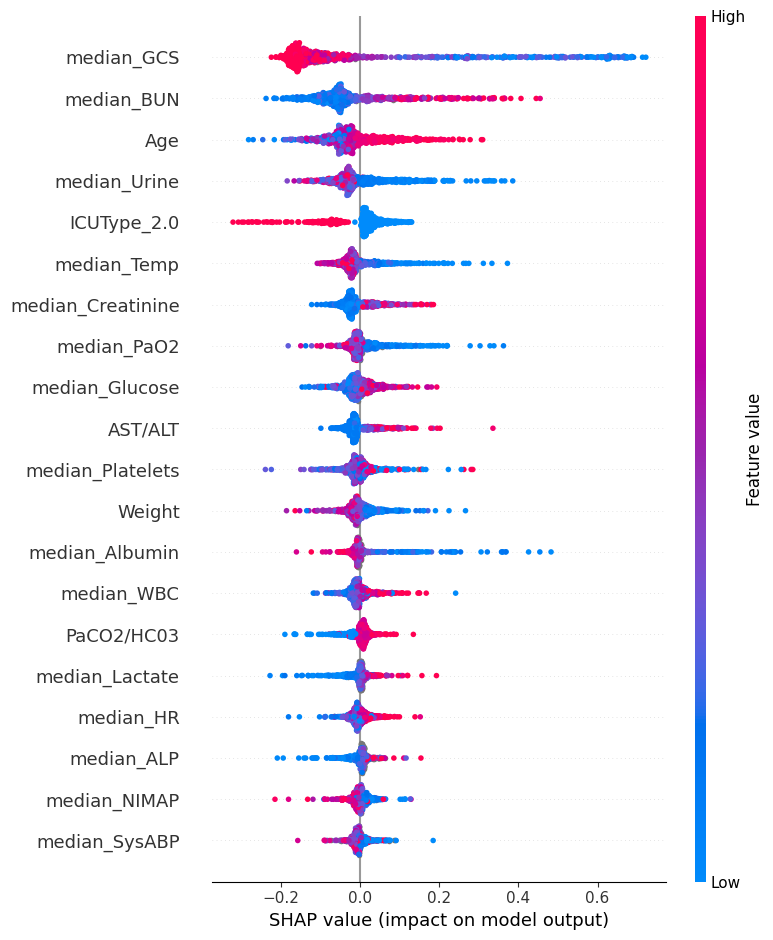

In [19]:
brf_explainer = shap.Explainer(brf_best_pipe.predict, X_test_median_fe1) # imblearn balancedRF not supported by TreeExplainer (supports only sklearn, xgboost, lightgbm, and catboost models). So using the model agnostic `Explainer` approach
shap_values_brf = brf_explainer(X_test_median_fe1)
shap.summary_plot(shap_values_brf)

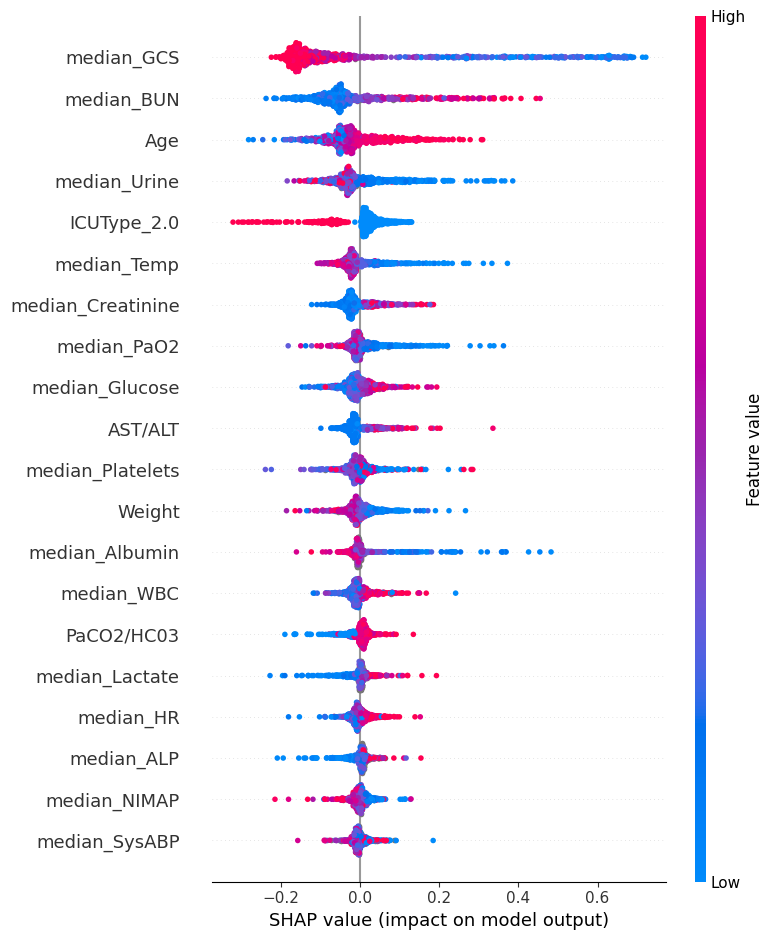

In [20]:
shap.summary_plot(shap_values_brf,X_test_median_fe1)

In [21]:
# # TreeExplainer for BalancedRandomForestClassifier is buggy
# brf_explainer = shap.TreeExplainer(brf_best_pipe.named_steps['classifier'])
# shap_values_brf = brf_explainer.shap_values(X_test_median_fe1)
# shap.summary_plot(shap_values_brf,X_test_median_fe1)

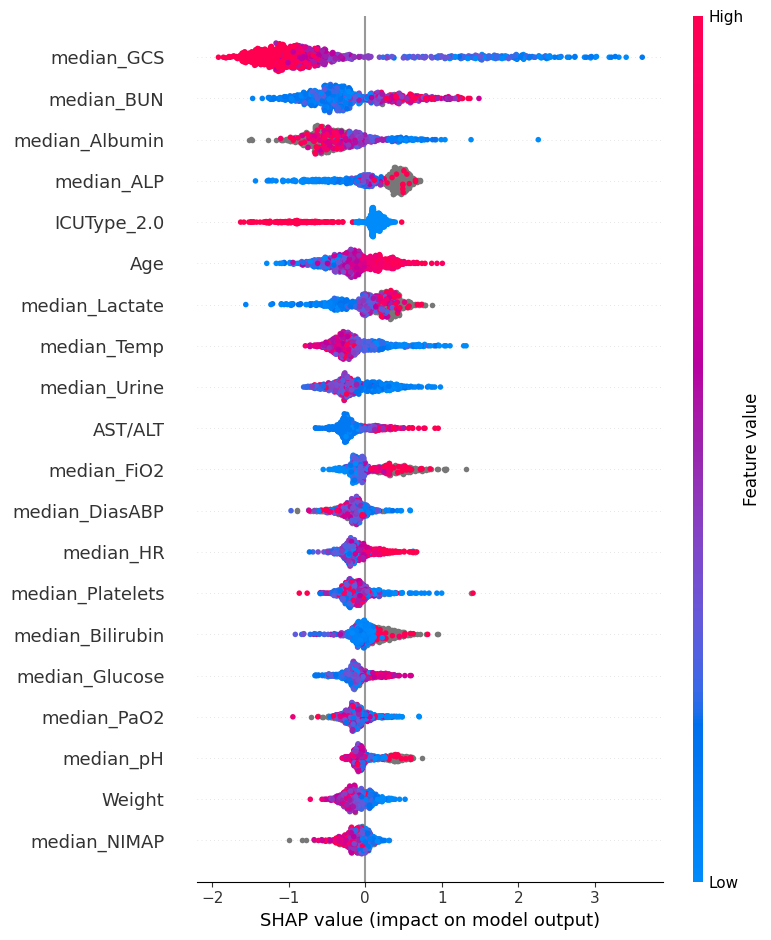

In [22]:
# Since it is supported, ise TreeExplainer for XgBoost 
xg_explainer = shap.TreeExplainer(xgboost_best_pipe.named_steps['classifier'])
shap_values_xg = xg_explainer.shap_values(X_test_median_fe1)
shap.summary_plot(shap_values_xg, X_test_median_fe1)

PermutationExplainer explainer: 801it [1:57:51,  8.85s/it]                           


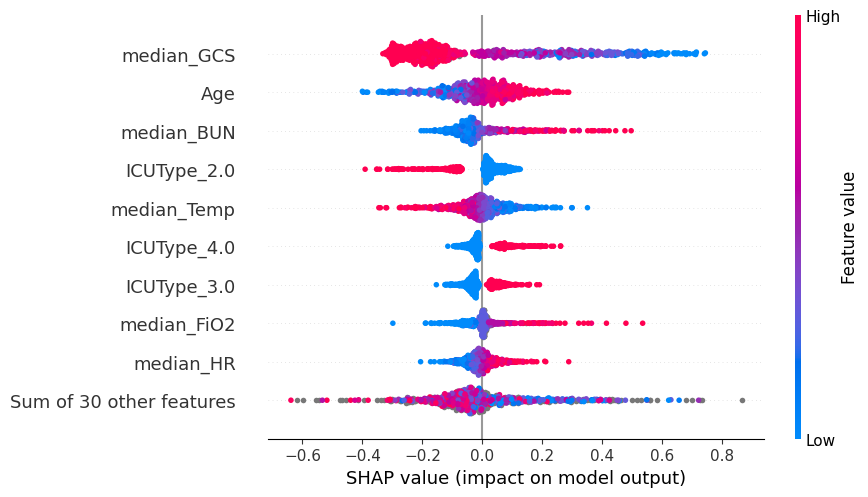

In [23]:
logreg_explainer = shap.Explainer(logreg_best_pipe.predict, X_test_median_fe1)
shap_values_lg = logreg_explainer(X_test_median_fe1)
shap.plots.beeswarm(shap_values_lg)

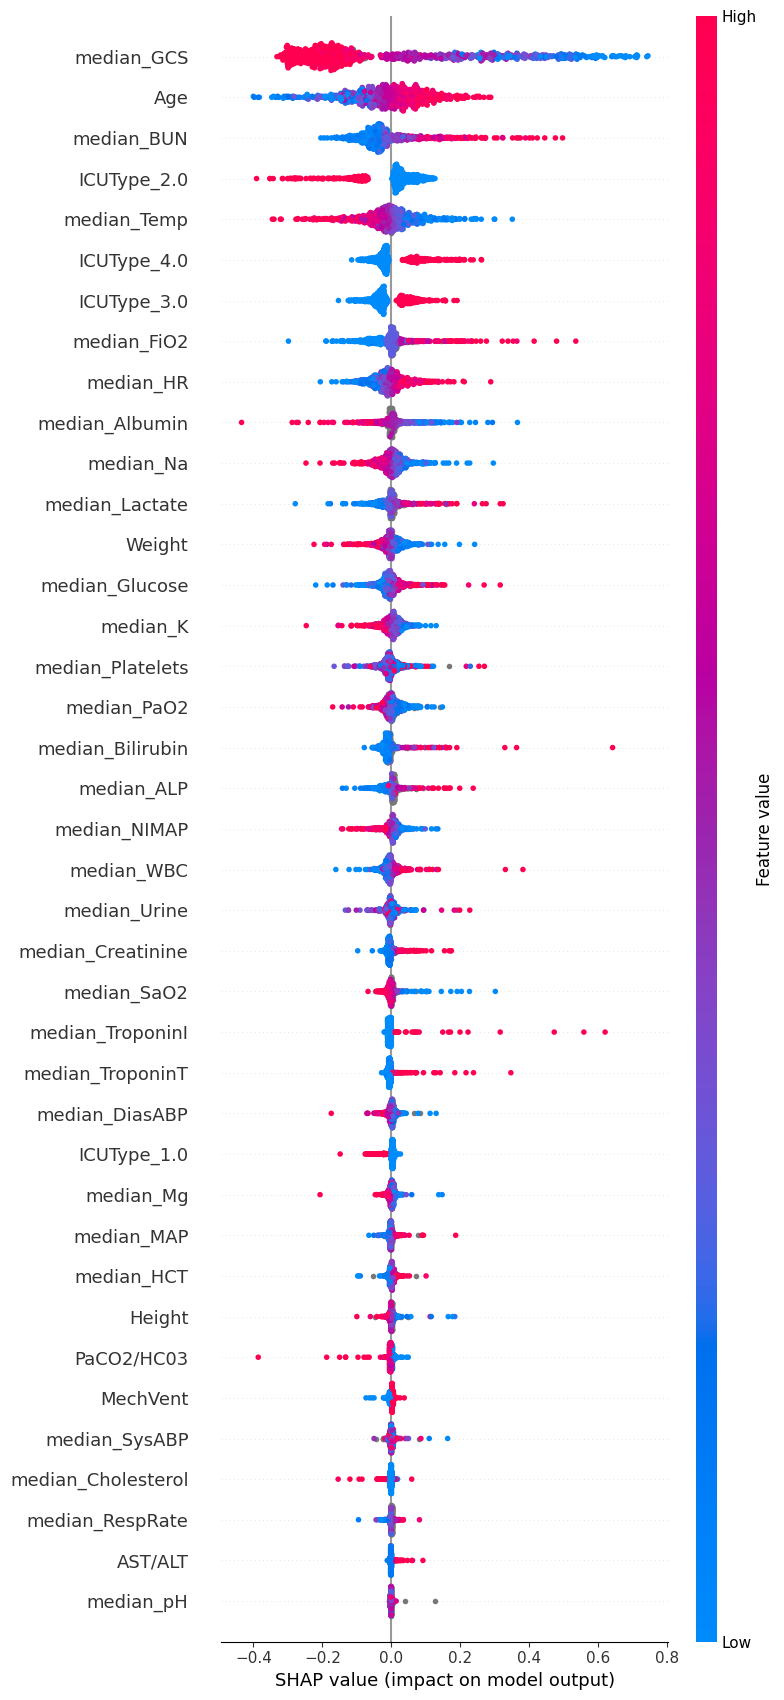

In [24]:
shap.summary_plot(shap_values_lg,X_test_median_fe1,max_display= X_test_median_fe1.shape[1]) # , feature_names=X_test_median_fe1.columns.to_list() , max_display= X_test_median_fe1.shape[1]
# shap.plots.beeswarm(shap_values_lg, max_display=X_test_median_fe1.shape[1])

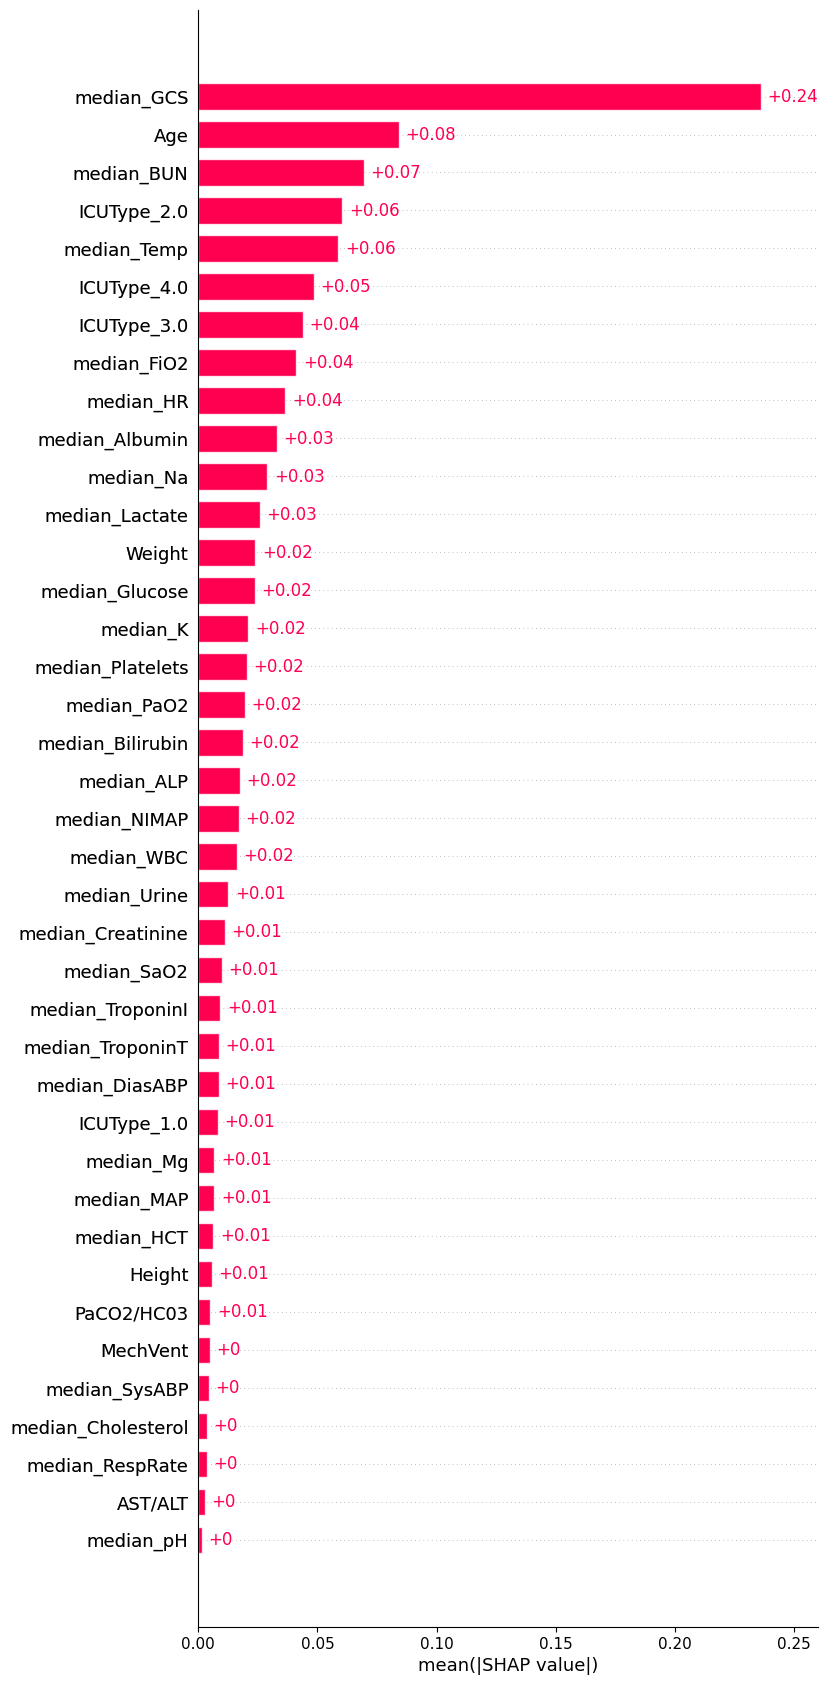

In [25]:
# shap.summary_plot(shap_values_lg,X_test_median_fe1, max_display= X_test_median_fe1.shape[1], plot_type="bar")
shap.plots.bar(shap_values_lg, max_display= X_test_median_fe1.shape[1])

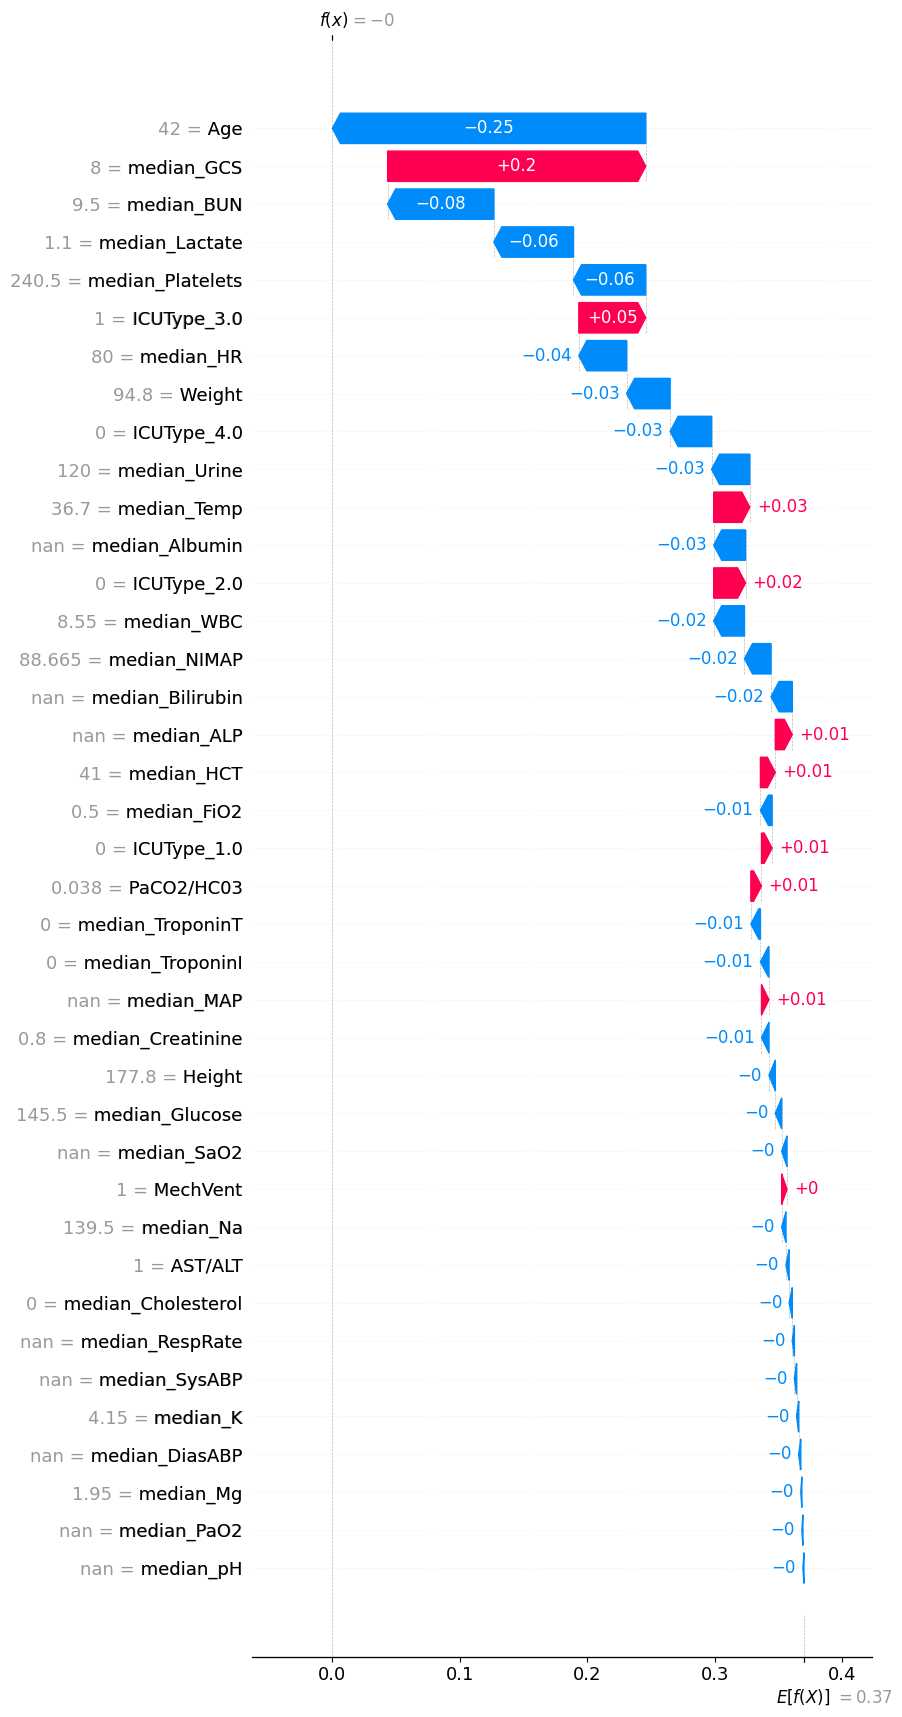

In [26]:
shap.plots.waterfall(shap_values_lg[42], max_display=X_test_median_fe1.shape[1])

# Side shenanigans
- Checking if dimensionality reduction before Random forest provides any value (since we tackled the highly correlated features through feature engineering already, odds are low, but getting the method down for future use)

GridSearchCV(estimator=Pipeline(memory='/tmp/tmp5ozm3ppq',
                                steps=[('impute', KNNImputer()),
                                       ('pca', PCA(iterated_power=7)),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=RandomState(MT19937) at 0x794567369B40))]),
             n_jobs=6,
             param_grid=[{'pca__n_components': [3, 4, 8, 10, 12, 15]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

Best parameter (CV score=%0.2f):0.07540860157095831
Best parameters: {'pca__n_components': 4}


<Figure size 800x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Principal Component Number')

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 1.0, 'Explained Variance Spectrum')

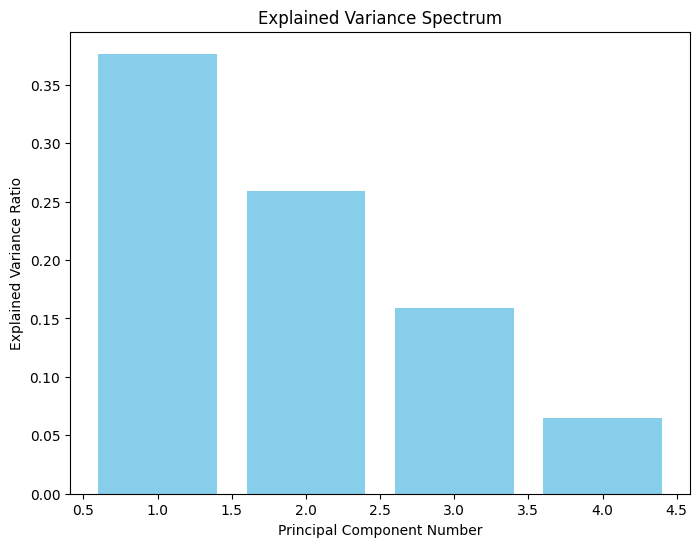

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Cumulative Explained Variance as a Function of the Number of Components')

Text(0, 0.5, 'Cumulative Explained variance')

Text(0.5, 0, 'Principal components')

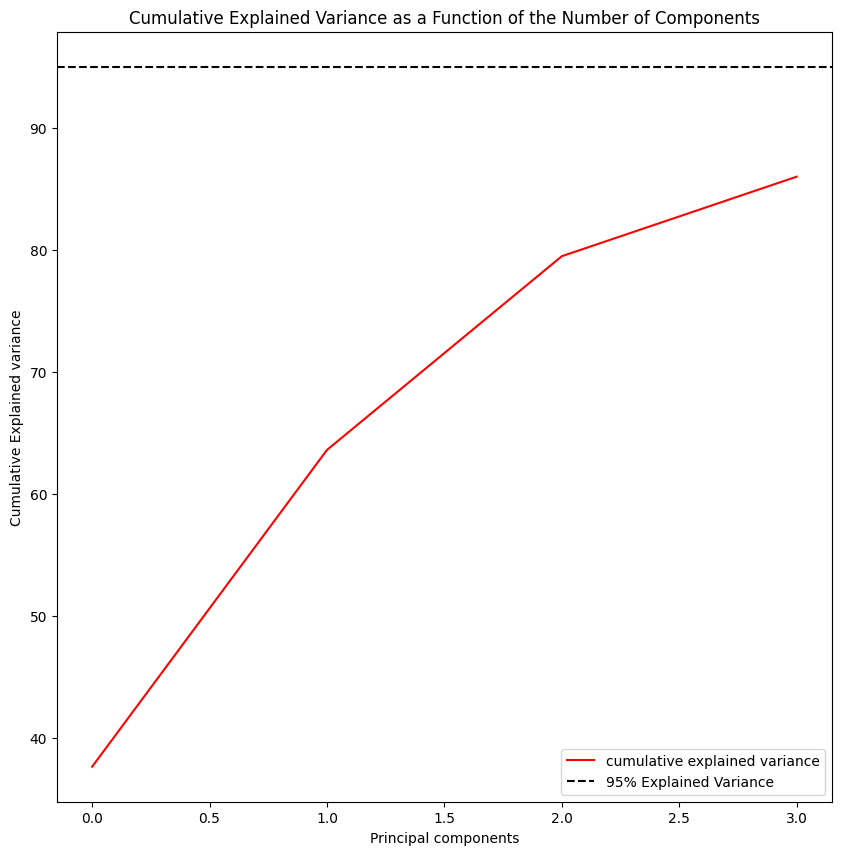

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from tempfile import mkdtemp

# ('classifier', RandomForestClassifier(random_state=rng, class_weight='balanced')) 
cache_dir = mkdtemp()
cached_pipeline = Pipeline(
    [
        ("impute", KNNImputer()), # pca can't handle NaN
        ("pca",PCA(iterated_power=7)), 
        ('classifier', RandomForestClassifier(random_state=rng, class_weight='balanced'))
    ], memory=cache_dir)

N_FEATURES_OPTIONS = [3, 4, 8, 10, 12,15]
# C_OPTIONS = [1, 10, 100, 1000]

param_grid = [
    {
        "pca__n_components": N_FEATURES_OPTIONS,
        # "classify__C": C_OPTIONS,
    },
    # {
    #     "reduce_dim": [SelectKBest(mutual_info_classif)],
    #     "reduce_dim__k": N_FEATURES_OPTIONS,
    #     # "classify__C": C_OPTIONS,
    # },
]
reducer_labels = ["PCA"] # ,  "KBest(mutual_info_classif)"

grid_search = GridSearchCV(cached_pipeline, n_jobs=6, param_grid=param_grid, scoring=ftwo_score)
grid_search.fit(X_train_median_fe1, y_train)

print(f"Best parameter (CV score=%0.2f):{grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

# Get the best estimator
best_pca = grid_search.best_estimator_.named_steps['pca']

# Extract explained variance ratio
explained_variance_ratio = best_pca.explained_variance_ratio_

# Plot the spectrum
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Spectrum')
plt.show()

cumulative_sum = np.cumsum(explained_variance_ratio)*100
d = [n for n in range(len(cumulative_sum))]

plt.figure(figsize=(10, 10))
plt.plot(d,cumulative_sum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')
plt.show()


In [28]:

# plt.plot(np.arange(1,len(search.)))